# Main

This will be the notebook to perform the steps required to generate the topographical hexagons I desire. I will import the functions written in the other files and combine them in such a way as to create the hexagons I desire.

### Initialisation
This code will set up the environment required to produce the plots I would like. As such, I'll be importing my python scripts and any other required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('image', cmap='terrain')


import loadData as LD
import CoordinateTransform as CT
import Hexagon as Hexagon

### Loading data
I will load in the data for both of the SRTM datasets and concatenate them into a single matrix.
From there, I will downsample the matrix twice until it is 1500 * 3000

In [2]:
seaVal = -2

D1,m1 = LD.load_asc_format('data\\srtm_35_04\\','srtm_35_04.asc',seaVal)
D2,m2 = LD.load_asc_format('data\\srtm_36_04\\','srtm_36_04.asc',seaVal)

D_combined = np.hstack((D1,D2))

In [ ]:
plt.figure(figsize = (10,4))

plt.subplot(1,4,1)
plt.imshow(D1,origin='lower',interpolation='bilinear')

plt.subplot(1,4,2)
plt.imshow(D2,origin='lower',interpolation='bilinear')

plt.subplot(1,2,2)
plt.imshow(D_combined,origin='lower',interpolation='bilinear')

plt.show()

### Downsampling and surface plotting

I will downsample the data to be able to create a surface plot. I will then be able to apply scaling functions to the downsampled data and see how they affect the model.

In [ ]:
# performing two downsamples on the matrix

newD,__ = LD.downsample_minimum(D_combined)
newD,__ = LD.downsample_minimum(newD)

In [ ]:
%matplotlib widget

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121, projection='3d')
x,y = range(np.size(newD,1)), range(np.size(newD,0))
X,Y = np.meshgrid(x,y)
ax1.plot_surface(X,Y,newD,rcount=100,ccount=100)

################################################################
idf = lambda x: x # identity function, for copying newD
nnewD = idf(newD)

#rescaling the heightmap by a function to exagerate lower elevations more
#k = 10
#w = lambda x: np.log(x)*k
#w = lambda x: np.sqrt(x)*k
#newD[newD > 0] = w(newD[newD > 0])

#w = lambda x: x/20
#newD[newD > 0] = w(newD[newD > 0])
w = lambda x: np.sqrt(x) #if x>0 else x
nnewD[nnewD > 0] = w(nnewD[nnewD > 0])

#################################################################

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X,Y,nnewD,rcount=100,ccount=100)

ax1.azim = 121
ax1.elev = 25
ax1.set_box_aspect((4,2,2))
ax2.set_zlim3d(seaVal-2)
ax2.azim = 121
ax2.elev = 25
ax2.set_box_aspect((4,2,2))
ax2.set_zlim3d(seaVal-2)
plt.show()

### Hexagons and culling

I will use the Hexagon and CoordinateTransform modules to cull our map in the shape of a hexagon with arbitrary centre and rotation.

In [ ]:
# Coordinate transform
'''
# start by creating the coordinate transform based on the metadata from the SRTM data.
newD,lcd = LD.downsample_minimum(D_combined)
#newM1 = m1
#newM1[2] = newM1[2] * lcd
ref1Img = [0,0]
ref1Coords = [m1[0],m1[1]]
ref2Img = [6000,3000]
ref2Coords = [0,45]
Transform = CT.CoordinateTransform(ref1Img,ref1Coords,None,ref2Img,ref2Coords)

'''

In [ ]:
cullValue = -20

newD,lcd = LD.downsample_minimum(D_combined)
print(lcd)
newM = m1.copy()
newM[2] = newM[2] * lcd
Transform = CT.CoordinateTransform(metadata=newM)


# going to get the coordinate reference for Oviedo
#coords = [-5.849259, 42.361374] #long,lat ## Oviedo
#coords = [-2.349515,43.091012] #long,lat  ## basque country
#coords = [-5,45]
coords = [-1.974412, 43.515345] # roughly the first point I want


img = Transform.coords2Img(coords)
print('Oviedo_img: {}'.format(img))

# create the hexagon of 200 pixels radius, centered on Oviedo
H = Hexagon.Hexagon(900,4,img)

# create all the points in image space
x = range(0,np.size(newD,1))
y = range(0,np.size(newD,0))
X,Y = np.meshgrid(x,y)
print(np.shape(X))

cullMask = H.outsideHexagon(X,Y)

plt.figure(figsize = (40,20))

plt.subplot(1,4,1)
plt.imshow(newD,origin='lower',interpolation='bilinear')


newD[cullMask] = cullValue

plt.subplot(1,4,2)
plt.imshow(newD,origin='lower',interpolation='bilinear')

H2 = H.createAdjacentHexagon(3)
newCullMask = H2.outsideHexagon(X,Y)
newD,__ = LD.downsample_minimum(D_combined)
newD[newCullMask] = cullValue
plt.subplot(1,4,3)
plt.imshow(newD,origin='lower',interpolation='bilinear')

newD,__ = LD.downsample_minimum(D_combined)
newD[np.logical_and(cullMask,newCullMask)] = cullValue
plt.subplot(1,4,4)
plt.imshow(newD,origin='lower',interpolation='bilinear')


newD created, size is (3000,6000)
[[4815.3528]
 [1929.207 ]]
[[ 0.8660254  0.8660254  0.        -0.8660254 -0.8660254  0.       ]
 [-0.5        0.5        1.         0.5       -0.5       -1.       ]]
[[ 1.         0.5       -0.5      ]
 [ 0.         0.8660254  0.8660254]]
(3000, 6000)
j: 0


ValueError: cannot reshape array of size 4 into shape (2,1)

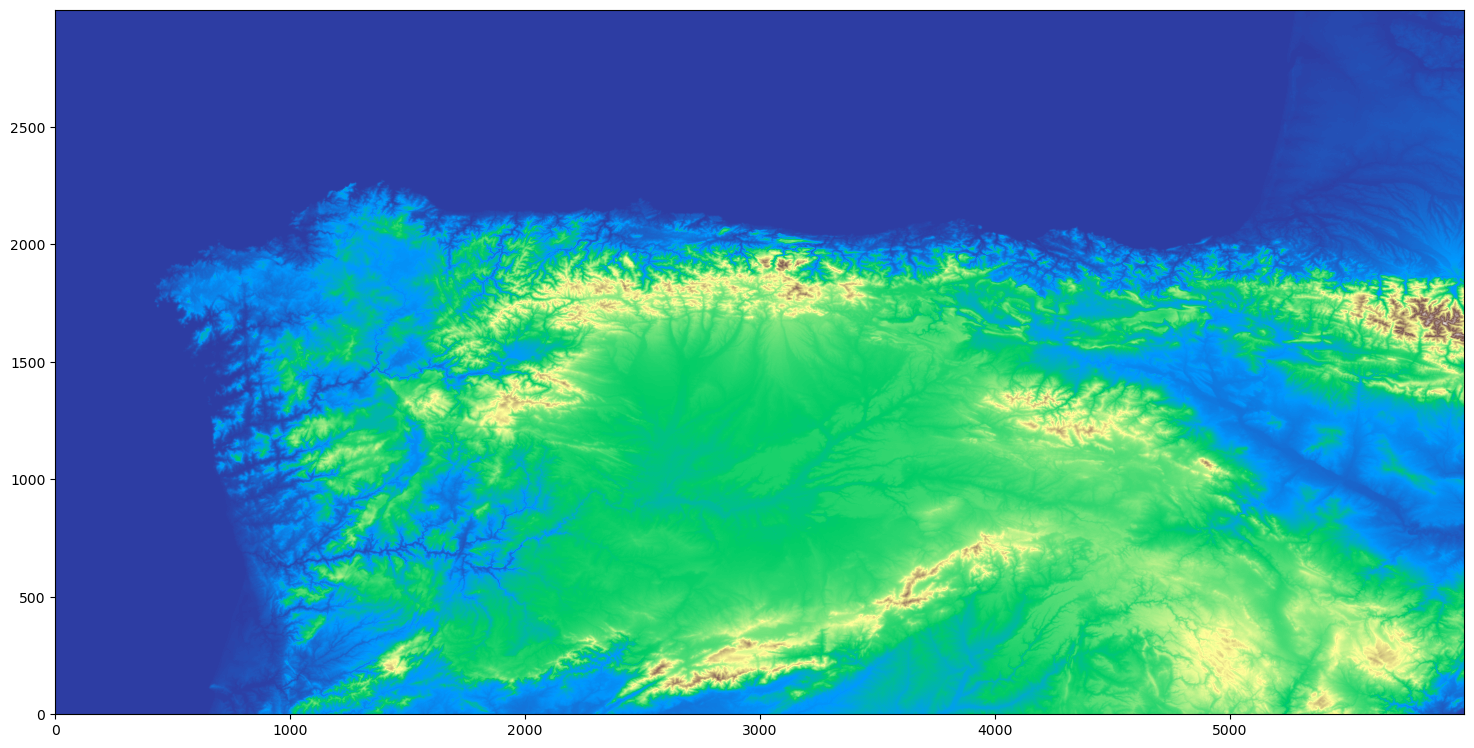

In [3]:
cullValue = -20

newD,lcd = LD.downsample_minimum(D_combined)
newM = m1.copy()
newM[2] = newM[2] * lcd
Transform = CT.CoordinateTransform(metadata=newM)


# going to get the coordinate reference for Oviedo
#coords = [-5.849259, 42.361374] #long,lat ## Oviedo
#coords = [-2.349515,43.091012] #long,lat  ## basque country
#coords = [-5,45]
coords = np.array([-1.974412, 43.215345]).reshape((2,1)) # roughly the first point I want


img = Transform.coords2Img(coords)
# create the hexagon of 200 pixels radius, centered on Oviedo
H = Hexagon.Hexagon(550,3,img)

# create all the points in image space
x = range(0,np.size(newD,1))
y = range(0,np.size(newD,0))
X,Y = np.meshgrid(x,y)
print(np.shape(X))

cullMask = H.outsideHexagon(X,Y)
#mask = cullMask.copy()
plt.figure(figsize = (40,20))

plt.subplot(1,2,1)
plt.imshow(newD,origin='lower',interpolation='bilinear')

for j in range(4): # create 4 additional hexagons to the left
    print('j: {}'.format(j))
    H = H.createAdjacentHexagon(3)
    cullMask = np.logical_and(cullMask,H.outsideHexagon(X,Y))
    
newD[cullMask] = cullValue
plt.subplot(1,2,2)
plt.imshow(newD,origin='lower',interpolation='bilinear')

In [ ]:
scaleD = newD.copy()
w = lambda x: np.sign(x)*np.log(np.abs(x)+1)

scaleD = w(scaleD)

In [ ]:
%matplotlib widget

fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,scaleD,rcount=40,ccount=80,cmap='terrain')